# Artificial Intelligence Homework 3
Dec 17 - 21, 2017

Use Hill Climbing(HC), Simulated Annealing(SA) and Genetic Algorithm(GA) to optimizing the following function.

$$f(x_1, x_2) = 21.5 + x_1 \, sin(4\pi x_1)+x_2 \, sin(20\pi x_2)$$

$$where\,-3.0 \le x_1 \le 12.1 \, and \, 4.1 \le x_2 \le 5.8$$

required precision is six places after the decimal points.

Reports must include:
- Result comparision for the above three optimization methods
- For GA, you need
    - the fitness curves (best and average of each generation and best-so-far)
    - the effects of population size, generation number, selection scheme, and genetic operator
    - a section of disscusion

# Genetic Algorithm (GA)
### Implement
- Using **[GAFT](https://github.com/PytLab/gaft)**, the Python Framwork for genetic algorithm computation.
- Discussion
    - Population Size
        - range from large to small
    - Generation Size
        - observe the plot
    - Selection Scheme
        - Proportionate Roulette Wheel Selection
        - Tournament Selection
        - Linear Ranking Selection
        - Exponential Ranking Selection
        - http://pytlab.org/2017/09/19/遗传算法中几种不同选择算子的比较/
    - Genetic Operator    

In [49]:
from gaft import GAEngine
from gaft.components import BinaryIndividual
from gaft.components import Population
from gaft.operators import *
from gaft.analysis.fitness_store import FitnessStore
from gaft.analysis.console_output import ConsoleOutput

import os
from math import sin, cos, pi, exp
import numpy as np

# Define Generation
generation = 70

# Define Population and the Constraints
population_size = 50
indv_template = BinaryIndividual(ranges = [(-3, 12.1), (4.1, 5.8)], eps = 0.001)
population = Population(indv_template = indv_template, size = population_size).init()

# Define Genetic Operators
## Selection : RouletteWheelSelection, TournamentSelection, LinearRankingSelection, ExpotentialRankingSelection
selection = RouletteWheelSelection()

## Crossover
### pc : probability of crossover(usually between 0.25 - 1.0)
### pe : gene exchange probability
crossover = UniformCrossover(pc=0.8, pe=0.5)

## Mutate
### pm : The probability of mutation (usually between 0.001 ~ 0.1)
### pbm : The probability of big mutation, usually more than 5 times bigger than pm
### alpha : intensive factor
mutation = FlipBitBigMutation(pm=0.1, pbm=0.55, alpha=0.6)

# Construct GA Engine
engine = GAEngine(population=population, 
                  selection=selection,
                  crossover=crossover, 
                  mutation=mutation,
                  analysis=[ConsoleOutput, FitnessStore])

# Define fitness function.
@engine.fitness_register
def fitness(indv):
    x1, x2 = indv.solution
    formula = 21.5 + x1*sin(4*pi*x1) + x2*sin(20*pi*x2)
    return formula

# Best Fitness values are export to best_fit.py
engine.run(ng = generation)

gaft.ConsoleOutput   INFO     Generation number: 70 Population number: 50
gaft.ConsoleOutput   INFO     Generation: 1, best fitness: 32.006, scaled fitness: 32.006
gaft.ConsoleOutput   INFO     Generation: 2, best fitness: 32.006, scaled fitness: 32.006
gaft.ConsoleOutput   INFO     Generation: 3, best fitness: 32.396, scaled fitness: 32.396
gaft.ConsoleOutput   INFO     Generation: 4, best fitness: 33.451, scaled fitness: 33.451
gaft.ConsoleOutput   INFO     Generation: 5, best fitness: 33.451, scaled fitness: 33.451
gaft.ConsoleOutput   INFO     Generation: 6, best fitness: 33.451, scaled fitness: 33.451
gaft.ConsoleOutput   INFO     Generation: 7, best fitness: 33.451, scaled fitness: 33.451
gaft.ConsoleOutput   INFO     Generation: 8, best fitness: 33.451, scaled fitness: 33.451
gaft.ConsoleOutput   INFO     Generation: 9, best fitness: 36.245, scaled fitness: 36.245
gaft.ConsoleOutput   INFO     Generation: 10, best fitness: 36.881, scaled fitness: 36.881
gaft.ConsoleOutput   INFO

### Evolution Curve

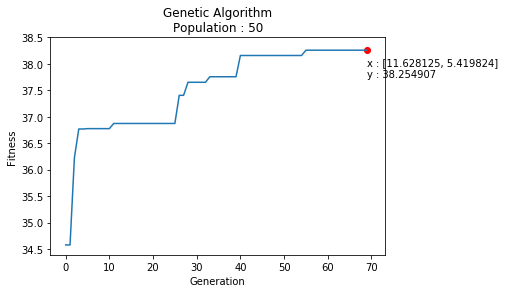

In [51]:
import matplotlib.pyplot as plt
from best_fit import best_fit

steps, variants, fits = list(zip(*best_fit))
best_step, best_v, best_f = steps[-1], variants[-1], fits[-1]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(steps, fits)
ax.set_xlabel('Generation')
ax.set_ylabel('Fitness')

# Plot the Maximum
ax.scatter([best_step], [best_f], facecolor='r')
ax.annotate(s='x : [{:.6f}, {:.6f}]\ny : {:.6f}'.format(*best_v, best_f),
                                                     xy=(best_step, best_f),
                                                     xytext=(best_step, best_f-0.5))
plt.title("Genetic Algorithm\nPopulation : " + str(population_size))
plt.show()

### The Surface

In [52]:
import mpl_toolkits.mplot3d
from tqdm import tqdm

ctr = 0

for i, (x, y), z in tqdm(best_fit):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter([x], [y], [z], zorder=99, c='r', s=100)

    x, y = np.mgrid[-4:13:100j, 4:6:100j]
    z = 21.5+x*np.sin(4*np.pi*x) + y*np.sin(20*np.pi*y)
    ax.plot_surface(x, y, z, rstride=2, cstride=2, cmap=plt.cm.bone_r)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    if not os.path.exists('./surfaces'):
        os.mkdir('./surfaces')
    fig.savefig('./surfaces/{}.png'.format(i))
    ctr += 1
    plt.close(fig)

100%|██████████| 70/70 [00:34<00:00,  2.00it/s]


### Observe the Effect of Population

# Simulated Annealing (SA)

Best_so_far {'outctr': 3, 'x': 0.2234520868313506, 'y': 5.542582737685824, 'temp': 100, 'length': 3, 'result': 24.063743987180242}
Best_so_far {'outctr': 4, 'x': 0.21636208556321349, 'y': 5.535884251600627, 'temp': 100, 'length': 4, 'result': 25.879780532456078}
Best_so_far {'outctr': 7, 'x': 0.2542201348890967, 'y': 5.425621502953533, 'temp': 100, 'length': 7, 'result': 26.908009790466306}
Best_so_far {'outctr': 68, 'x': 0.12093803454356244, 'y': 5.326003015674304, 'temp': 100, 'length': 68, 'result': 26.93621041972726}
Best_so_far {'outctr': 83, 'x': 0.19560853622740218, 'y': 5.529319266304312, 'temp': 100, 'length': 83, 'result': 26.950474880392527}
Best_so_far {'outctr': 102, 'x': 0.20475174646541733, 'y': 5.5282970591812886, 'temp': 99.0, 'length': 2, 'result': 27.020346386684626}
Best_so_far {'outctr': 107, 'x': 0.23603415833465521, 'y': 5.524305118577551, 'temp': 99.0, 'length': 7, 'result': 27.060252249808599}
Best_so_far {'outctr': 171, 'x': 0.5327498668473505, 'y': 5.62622333

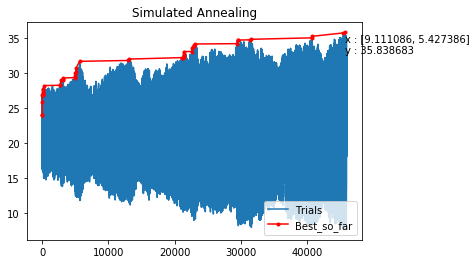

In [44]:
# Using Hill Climbing Algorithm(HC) to find the maximum value of the specific function in the constraint area. 
import random
import numpy as np
import matplotlib.pyplot as plt

def random_move(x, y):
    ''' 
    Random move around the current point
    '''
    x = (random.uniform(0.0001, 0.9999) - 0.5) * 0.1 + x
    y = (random.uniform(0.0001, 0.9999) - 0.5) * 0.1 + y
    return x, y

def check_constraints(x, y):
    '''
    Check whether the points are located in the constraints or not
    '''
    return True if -3 <= x <= 12.1 and 4.1 <= y <= 5.8 else False
 
def optimizing_function(x, y, temp, length, outctr):
    '''
    Setting the optimizing function
    '''
    result = 21.5 + x*np.sin(4*np.pi*x) + y*np.sin(20*np.pi*y)
    return {"outctr" : outctr, "x": x, "y" : y, "temp" : temp, "length" : length, "result" : result}

def boltzman_probability(next_result, current_result, temp):
    dE = next_result - current_result
    if dE >= 0:
        prob = 1
    else:
        prob = np.exp(-dE / temp)
    return prob

def SimulatedAnnealing(x, y, temp, minTemp, coolingRate, length):
    '''
    Implement SimulatedAnnealing

    Returns:
        iteration: record every trials that have been explored
        best_iteration: record the trails that have improved the value
    '''

    ctr = 1
    out_ctr = 1

    iteration = []
    best_iteration = []

    current_state = optimizing_function(x, y, temp, 1, out_ctr)
    iteration.append(current_state)
    best_iteration.append(current_state)
    best_result = best_iteration[-1]["result"]

    while minTemp < temp:
        while ctr <= length:
            while not check_constraints(x, y):
                new_x, new_y = random_move(x, y)
                if check_constraints(new_x, new_y): 
                    x, y = new_x, new_y
                    break
            
            next_state = optimizing_function(x, y, temp, ctr, out_ctr)
            iteration.append(next_state)

            prob = boltzman_probability(next_state["result"], current_state["result"], temp)
            prob_accept = random.choice([1] * int(prob*100) + [0] * int(100 - (prob*100)))
            if prob == 1 or prob_accept == 1:
                if next_state["result"] > best_result:
                    best_iteration.append(next_state) 
                    best_result = best_iteration[-1]["result"]
                    print("Best_so_far", next_state)
                current_state = next_state
                
            x, y = random_move(x, y)
            ctr += 1
            out_ctr += 1
        ctr = 1
        temp = temp * coolingRate

    return best_iteration, iteration

# Main Function
## Random start at the point in the constraint area
initial_x, initial_y = {random.uniform(-3,  12.1), random.uniform(4.1, 5.8)}
temp = 100
minTemp = 1
coolingRate = 0.99
length = 100
best_solution, iteration = SimulatedAnnealing(initial_x, initial_y, temp, minTemp, coolingRate, length)

#print(iteration)
print("Best Solution : ", best_solution[-1]["result"])

plt.plot(range(len(iteration)), [item['result'] for item in iteration], label = "Trials")
plt.plot([item['outctr'] for item in best_solution], [item['result'] for item in best_solution], '.r-', label = "Best_so_far")
plt.annotate(s = 'x : [{:.6f}, {:.6f}]\ny : {:.6f}'.format(best_solution[-1]["x"], best_solution[-1]["y"], best_solution[-1]["result"]), xy = (best_solution[-1]["outctr"], best_solution[-1]["result"]), xytext=(best_solution[-1]["outctr"], best_solution[-1]["result"]-3))
plt.title("Simulated Annealing")
plt.legend(loc='lower right')
plt.show()

# Restart if it doesn't print out anything

# Hill Climbing

Best Solution :  34.8390396765


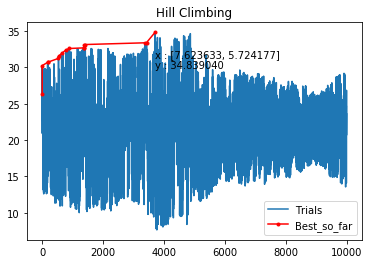

In [12]:
# Using Hill Climbing Algorithm(HC) to find the maximum value of the specific function in the constraint area. 
import random
import numpy as np
import matplotlib.pyplot as plt

def random_move(x, y):
    ''' 
    Random move around the current point
    '''
    x = (random.uniform(0,0.9999)-0.5)*0.1 + x
    y = (random.uniform(0,0.9999)-0.5)*0.1 + y
    return x, y

def check_constraints(x, y):
    '''
    Check whether the points are located in the constraints or not
    '''
    return True if -3 <= x <= 12.1 and 4.1 <= y <= 5.8 else False
 
def optimizing_function(ctr, x, y):
    '''
    Setting the optimizing function
    '''
    result = 21.5 + x*np.sin(4*np.pi*x) + y*np.sin(20*np.pi*y)
    return {"ctr" : ctr, "x": x, "y" : y, "result" : result}

def HillClimbing(x, y, threshold, Function):
    '''
    Implement Hill Climbing

    Returns:
        iteration: record every trials that have been explored
        best_iteration: record the trails that have improved the value
    '''
    ctr = 1
    iteration = []
    best_iteration = []

    # Random Start
    current_state = optimizing_function(ctr, x, y)
    iteration.append(current_state)
    best_iteration.append(current_state)

    # Start explore the neighbor of the point
    while ctr <= threshold:
        while not check_constraints(x, y):
            x, y = random_move(x, y)
            
        next_state = optimizing_function(ctr, x, y)
        iteration.append(next_state)

        # Update the best_so_far if the value is improved
        if next_state["result"] > current_state["result"]:
            best_iteration.append(next_state)
            #print("Best_so_far", next_state)
            current_state = next_state
        
        # Try another neighbor
        x, y = random_move(x, y)
        ctr += 1
    return best_iteration, iteration

# Main Function
## Random start at the point in the constraint area
initial_x, initial_y = {random.uniform(-3,  12.1), random.uniform(4.1, 5.8)}
best_solution, iteration = HillClimbing(initial_x, initial_y, 10000, optimizing_function)
print("Best Solution : ", best_solution[-1]["result"])

# Plot the iteration and best_iteration
plt.plot(range(len(iteration)), [item['result'] for item in iteration], label = "Trials")
plt.plot([item['ctr'] for item in best_solution], [item['result'] for item in best_solution], '.r-', label = "Best_so_far")
plt.annotate(s = 'x : [{:.6f}, {:.6f}]\ny : {:.6f}'.format(best_solution[-1]["x"], best_solution[-1]["y"], best_solution[-1]["result"]), xy = (best_solution[-1]["ctr"], best_solution[-1]["result"]), xytext=(best_solution[-1]["ctr"], best_solution[-1]["result"]-5))
plt.title("Hill Climbing")
plt.legend(loc='lower right')
plt.show()

# Restart if it doesn't print out anything